# Statistical Test

In [6]:
from scipy import stats
import pandas as pd
import numpy as np

In [7]:
def significance_test(before_df, after_df, metrics, thresh=0.05):
    for metric in metrics:
        before = before_df[metric].tolist()
        after = after_df[metric].tolist()
        pvalue = stats.ttest_rel(before, after).pvalue
        print(pvalue)
        if pvalue <= thresh:
            print(f"{metric} score is statistically significant")
        else:
            print(f"{metric} score is statistically insignificant")

# Part 1: Hybrid using Alpha Linear Combo

The linear combination can be formulated as the following
\begin{gather*} 
Score(Q,D) =  \alpha*sim_{DPR}(Q,D) + (1-\alpha)*sim_{sparse}(Q,D)
\end{gather*}

## Sparse Model vs Hybrid Sparse-Dense Model

### BM25 vs BM25-DPR

In [3]:
bm25 = pd.read_csv('bm25_eval_scores.csv')
bm25_dpr = pd.read_csv('dpr-bm25_eval_scores.csv')

In [4]:
metrics = bm25.columns

In [5]:
significance_test(bm25, bm25_dpr, metrics)

0.26144749238862963
Precision score is statistically insignificant
0.5507906777105906
MRR score is statistically insignificant
0.6505731168774291
MAP score is statistically insignificant
0.7721089044773128
BPref score is statistically insignificant


### LMD vs LMD-DPR

In [21]:
lmd = pd.read_csv('lmd_eval_scores.csv')
lmd_dpr = pd.read_csv('dpr-lmd_eval_scores.csv')

In [22]:
metrics = lmd.columns

In [23]:
significance_test(lmd, lmd_dpr, metrics)

0.44476919273155346
Precision score is statistically insignificant
0.20275065648401372
MRR score is statistically insignificant
0.006165099537036717
MAP score is statistically significant
0.020355365789055023
BPref score is statistically significant


### TFIDF vs TFIDF-DPR

In [24]:
tfidf = pd.read_csv('classic_eval_scores.csv')
tfidf_dpr = pd.read_csv('dpr-classic_eval_scores.csv')

In [25]:
metrics = tfidf.columns

In [26]:
significance_test(tfidf, tfidf_dpr, metrics)

3.498216436094887e-07
Precision score is statistically significant
2.5705030672593996e-06
MRR score is statistically significant
3.8139253447427326e-08
MAP score is statistically significant
0.614456714898676
BPref score is statistically insignificant


## Dense Model vs Hybrid Sparse-Dense Model

### DPR vs BM25-DPR

In [27]:
dpr = pd.read_csv('dpr_eval_scores.csv')
bm25_dpr = pd.read_csv('dpr-bm25_eval_scores.csv')

In [28]:
metrics = dpr.columns

In [29]:
significance_test(dpr, bm25_dpr, metrics)

7.072986975026795e-17
Precision score is statistically significant
2.432815048608907e-13
MRR score is statistically significant
1.897774665058773e-16
MAP score is statistically significant
0.004963517120266088
BPref score is statistically significant


### DPR vs LMD-DPR

In [30]:
dpr = pd.read_csv('dpr_eval_scores.csv')
lmd_dpr = pd.read_csv('dpr-lmd_eval_scores.csv')

In [31]:
significance_test(dpr, lmd_dpr, metrics)

4.2324973901698754e-13
Precision score is statistically significant
2.315850397647489e-12
MRR score is statistically significant
2.023733113646857e-14
MAP score is statistically significant
0.008501351559068452
BPref score is statistically significant


### DPR vs TFIDF-DPR

In [32]:
dpr = pd.read_csv('dpr_eval_scores.csv')
tfidf_dpr = pd.read_csv('dpr-classic_eval_scores.csv')

In [33]:
significance_test(dpr, tfidf_dpr, metrics)

1.190941844847133e-13
Precision score is statistically significant
1.1511002932690796e-05
MRR score is statistically significant
4.2767931939073933e-10
MAP score is statistically significant
0.4305712127018986
BPref score is statistically insignificant


# Part 2: Hybrid using Alpha Beta Linear Combo

The linear combination can be formulated as the following
\begin{gather*} 
Score(Q,D) =  \alpha*sim_{sparse}(Q,D) + \beta*sim_{DPR}(Q,D)
\end{gather*}
Those "optimized" hyperparameters can be found by using logistic regression.

## Sparse Model vs Hybrid Sparse-Dense Model

### BM25 vs BM25-DPR

In [34]:
bm25 = pd.read_csv('bm25_eval_scores.csv')
bm25_dpr = pd.read_csv('dpr-bm25-v2_eval_scores.csv')

In [35]:
metrics = bm25.columns

In [36]:
significance_test(bm25, bm25_dpr, metrics)

0.01075116230900151
Precision score is statistically significant
0.46246217635290454
MRR score is statistically insignificant
0.45536458580905004
MAP score is statistically insignificant
0.38793949620349866
BPref score is statistically insignificant


### LMD vs LMD-DPR

In [37]:
lmd = pd.read_csv('lmd_eval_scores.csv')
lmd_dpr = pd.read_csv('dpr-lmd-v2_eval_scores.csv')

In [38]:
metrics = lmd.columns

In [39]:
significance_test(lmd, lmd_dpr, metrics)

0.6995090685108187
Precision score is statistically insignificant
0.10957790448279277
MRR score is statistically insignificant
0.019360638242302518
MAP score is statistically significant
0.01888568799862262
BPref score is statistically significant


### TFIDF vs TFIDF-DPR

In [40]:
tfidf = pd.read_csv('classic_eval_scores.csv')
tfidf_dpr = pd.read_csv('dpr-classic-v2_eval_scores.csv')

In [41]:
metrics = tfidf.columns

In [42]:
significance_test(tfidf, tfidf_dpr, metrics)

8.759124695153785e-08
Precision score is statistically significant
0.00017727001917713976
MRR score is statistically significant
9.398128617144757e-07
MAP score is statistically significant
0.8877746062256711
BPref score is statistically insignificant


## Dense Model vs Hybrid Sparse-Dense Model

### DPR vs BM25-DPR

In [43]:
dpr = pd.read_csv('dpr_eval_scores.csv')
bm25_dpr = pd.read_csv('dpr-bm25-v2_eval_scores.csv')

In [44]:
metrics = dpr.columns

In [45]:
significance_test(dpr, bm25_dpr, metrics)

1.8516492942854568e-17
Precision score is statistically significant
2.991511887039201e-14
MRR score is statistically significant
6.621574329918395e-15
MAP score is statistically significant
0.11494483562521562
BPref score is statistically insignificant


### DPR vs LMD-DPR

In [46]:
dpr = pd.read_csv('dpr_eval_scores.csv')
lmd_dpr = pd.read_csv('dpr-lmd-v2_eval_scores.csv')

In [47]:
significance_test(dpr, lmd_dpr, metrics)

2.79710793458081e-13
Precision score is statistically significant
8.255414294207241e-12
MRR score is statistically significant
1.3802764822543625e-12
MAP score is statistically significant
0.05263509312298769
BPref score is statistically insignificant


### DPR vs TFIDF-DPR

In [48]:
dpr = pd.read_csv('dpr_eval_scores.csv')
tfidf_dpr = pd.read_csv('dpr-classic-v2_eval_scores.csv')

In [49]:
significance_test(dpr, tfidf_dpr, metrics)

1.5194697212887434e-13
Precision score is statistically significant
7.674217668795197e-07
MRR score is statistically significant
1.2770210782503964e-09
MAP score is statistically significant
0.16337845235837167
BPref score is statistically insignificant


## Alpha vs AlphaBeta

### DPR-BM25

In [50]:
bm25_dpr1 = pd.read_csv('dpr-bm25_eval_scores.csv')
bm25_dpr2 = pd.read_csv('dpr-bm25-v2_eval_scores.csv')

In [51]:
metrics = bm25_dpr1.columns

In [52]:
significance_test(bm25_dpr1, bm25_dpr2, metrics)

0.01785150120919798
Precision score is statistically significant
0.11987175638934307
MRR score is statistically insignificant
0.9586796156650557
MAP score is statistically insignificant
0.5105200960531098
BPref score is statistically insignificant


### DPR-LMD

In [53]:
lmd_dpr1 = pd.read_csv('dpr-lmd_eval_scores.csv')
lmd_dpr2 = pd.read_csv('dpr-lmd-v2_eval_scores.csv')

In [54]:
metrics = lmd_dpr1.columns

In [55]:
significance_test(lmd_dpr1, lmd_dpr2, metrics)

0.09592683282478848
Precision score is statistically insignificant
0.7664505213456678
MRR score is statistically insignificant
0.22025322619480533
MAP score is statistically insignificant
0.23331943404187214
BPref score is statistically insignificant


### DPR-TFIDF

In [56]:
tfidf_dpr1 = pd.read_csv('dpr-classic_eval_scores.csv')
tfidf_dpr2 = pd.read_csv('dpr-classic-v2_eval_scores.csv')

In [57]:
metrics = tfidf_dpr1.columns

In [58]:
significance_test(tfidf_dpr1, tfidf_dpr2, metrics)

0.004111142212827626
Precision score is statistically significant
0.008098439921975838
MRR score is statistically significant
0.01403988622428856
MAP score is statistically significant
0.7422957407126974
BPref score is statistically insignificant


# Part 3: Retriever - Reranker Approach

## Dense Retriever - Sparse Reranker vs Sparse Retriever

### DPR Retriever-BM25 Reranker vs BM25

In [59]:
bm25 = pd.read_csv('bm25_eval_scores.csv')
bm25_dpr = pd.read_csv('retrieve-dpr_rerank-bm25_eval_scores.csv')

In [60]:
metrics = bm25.columns

In [61]:
significance_test(bm25, bm25_dpr, metrics)

2.5730247294121914e-11
Precision score is statistically significant
0.00011783747459858636
MRR score is statistically significant
7.332229920708977e-06
MAP score is statistically significant
0.4180875316759126
BPref score is statistically insignificant


### DPR Retriever-LMD Reranker vs LMD

In [62]:
lmd = pd.read_csv('lmd_eval_scores.csv')
lmd_dpr = pd.read_csv('retrieve-dpr_rerank-lmd_eval_scores.csv')

In [63]:
metrics = lmd.columns

In [64]:
significance_test(lmd, lmd_dpr, metrics)

5.634917040688981e-07
Precision score is statistically significant
0.0007339024929751702
MRR score is statistically significant
0.000862345569271965
MAP score is statistically significant
0.33574416571826815
BPref score is statistically insignificant


### DPR Retriever-TFIDF Reranker vs TFIDF

In [65]:
tfidf = pd.read_csv('classic_eval_scores.csv')
tfidf_dpr = pd.read_csv('retrieve-dpr_rerank-classic_eval_scores.csv')

In [66]:
metrics = tfidf.columns

In [67]:
significance_test(tfidf, tfidf_dpr, metrics)

6.70275257789475e-12
Precision score is statistically significant
1.229710620862136e-09
MRR score is statistically significant
5.084940187609723e-12
MAP score is statistically significant
0.32601008361632666
BPref score is statistically insignificant


## Dense Retriever - Sparse Reranker vs Dense Retriever

### DPR Retriever-BM25 Reranker vs DPR

In [68]:
dpr = pd.read_csv('dpr_eval_scores.csv')
bm25_dpr = pd.read_csv('retrieve-dpr_rerank-bm25_eval_scores.csv')

In [69]:
metrics = dpr.columns

In [70]:
significance_test(dpr, bm25_dpr, metrics)

6.249028084516576e-07
Precision score is statistically significant
5.902677455866527e-06
MRR score is statistically significant
4.56510320247382e-06
MAP score is statistically significant
0.006443005255646695
BPref score is statistically significant


### DPR Retriever-LMD Reranker vs DPR

In [71]:
dpr = pd.read_csv('dpr_eval_scores.csv')
lmd_dpr = pd.read_csv('retrieve-dpr_rerank-lmd_eval_scores.csv')

In [72]:
significance_test(dpr, lmd_dpr, metrics)

2.0566611640634678e-07
Precision score is statistically significant
3.4131007779587523e-05
MRR score is statistically significant
3.330979966327298e-06
MAP score is statistically significant
0.00992586419448507
BPref score is statistically significant


### DPR Retriever-TFIDF Reranker vs DPR

In [73]:
dpr = pd.read_csv('dpr_eval_scores.csv')
tfidf_dpr = pd.read_csv('retrieve-dpr_rerank-classic_eval_scores.csv')

In [74]:
significance_test(dpr, tfidf_dpr, metrics)

0.0024431022663771217
Precision score is statistically significant
0.22769942457680215
MRR score is statistically insignificant
0.1897677649949973
MAP score is statistically insignificant
0.34331001466059985
BPref score is statistically insignificant


## Sparse Retriever - Dense Reranker vs Sparse Retriever

### BM25 Retriever - DPR Reranker vs BM25

In [75]:
bm25 = pd.read_csv('bm25_eval_scores.csv')
bm25_dpr = pd.read_csv('retrieve-bm25_rerank-dpr_eval_scores.csv')

In [76]:
metrics = bm25.columns

In [77]:
significance_test(bm25, bm25_dpr, metrics)

3.2143432464427665e-09
Precision score is statistically significant
8.940156883235118e-09
MRR score is statistically significant
1.160672720732783e-10
MAP score is statistically significant
0.012952834987216168
BPref score is statistically significant


### LMD Retriever - DPR Reranker vs LMD

In [78]:
lmd = pd.read_csv('lmd_eval_scores.csv')
lmd_dpr = pd.read_csv('retrieve-lmd_rerank-dpr_eval_scores.csv')

In [79]:
metrics = lmd.columns

In [80]:
significance_test(lmd, lmd_dpr, metrics)

8.0314490685472e-09
Precision score is statistically significant
0.00014976349548348488
MRR score is statistically significant
8.954554756032532e-07
MAP score is statistically significant
0.5293480508817343
BPref score is statistically insignificant


### TFIDF Retriever - DPR Reranker vs TFIDF

In [81]:
tfidf = pd.read_csv('classic_eval_scores.csv')
tfidf_dpr = pd.read_csv('retrieve-classic_rerank-dpr_eval_scores.csv')

In [82]:
metrics = tfidf.columns

In [83]:
significance_test(tfidf, tfidf_dpr, metrics)

1.3107537952667339e-11
Precision score is statistically significant
1.086250015064519e-10
MRR score is statistically significant
1.7932144253856398e-12
MAP score is statistically significant
0.004292484052335768
BPref score is statistically significant


## Sparse Retriever - Dense Reranker vs Dense Retriever

### BM25 Retriever - DPR Reranker vs DPR

In [84]:
dpr = pd.read_csv('dpr_eval_scores.csv')
bm25_dpr = pd.read_csv('retrieve-bm25_rerank-dpr_eval_scores.csv')

In [85]:
metrics = dpr.columns

In [86]:
significance_test(dpr, bm25_dpr, metrics)

2.8032261097675714e-06
Precision score is statistically significant
0.02284499378142517
MRR score is statistically significant
0.002837144867530982
MAP score is statistically significant
0.3160224198697568
BPref score is statistically insignificant


### LMD Retriever - DPR Reranker vs DPR

In [87]:
dpr = pd.read_csv('dpr_eval_scores.csv')
lmd_dpr = pd.read_csv('retrieve-lmd_rerank-dpr_eval_scores.csv')

In [88]:
significance_test(dpr, lmd_dpr, metrics)

5.5242362446390464e-05
Precision score is statistically significant
0.012879271567164967
MRR score is statistically significant
0.00633189839719097
MAP score is statistically significant
0.6524068692488695
BPref score is statistically insignificant


In [89]:
dpr = pd.read_csv('dpr_eval_scores.csv')
tfidf_dpr = pd.read_csv('retrieve-classic_rerank-dpr_eval_scores.csv')

In [90]:
significance_test(dpr, tfidf_dpr, metrics)

2.5265347618023067e-05
Precision score is statistically significant
0.150787552560817
MRR score is statistically insignificant
0.007766572780141088
MAP score is statistically significant
0.036446362657300994
BPref score is statistically significant


## Sparse Reranker - Dense Retriever vs Sparse Retriever - Dense Reranker

### BM25 Reranker - DPR Retriever vs BM25 Retriever - DPR Reranker

In [91]:
bm25_dpr1 = pd.read_csv('retrieve-dpr_rerank-bm25_eval_scores.csv')
bm25_dpr2 = pd.read_csv('retrieve-bm25_rerank-dpr_eval_scores.csv')

In [92]:
metrics = bm25_dpr1.columns

In [93]:
significance_test(bm25_dpr1, bm25_dpr2, metrics)

0.02000230300928026
Precision score is statistically significant
0.1057855610768931
MRR score is statistically insignificant
0.18396700810202427
MAP score is statistically insignificant
0.02853569932942869
BPref score is statistically significant


### LMD Reranker - DPR Retriever vs LMD Retriever - DPR Reranker

In [94]:
lmd_dpr1 = pd.read_csv('retrieve-dpr_rerank-lmd_eval_scores.csv')
lmd_dpr2 = pd.read_csv('retrieve-lmd_rerank-dpr_eval_scores.csv')

In [95]:
metrics = lmd_dpr1.columns

In [96]:
significance_test(lmd_dpr1, lmd_dpr2, metrics)

0.25927849728108887
Precision score is statistically insignificant
0.5258398157989936
MRR score is statistically insignificant
0.16196372069586445
MAP score is statistically insignificant
0.09565396379593222
BPref score is statistically insignificant


### TFIDF Reranker - DPR Retriever vs TFIDF Retriever - DPR Reranker

In [97]:
tfidf_dpr1 = pd.read_csv('retrieve-dpr_rerank-classic_eval_scores.csv')
tfidf_dpr2 = pd.read_csv('retrieve-classic_rerank-dpr_eval_scores.csv')

In [98]:
metrics = tfidf_dpr1.columns

In [99]:
significance_test(tfidf_dpr1, tfidf_dpr2, metrics)

0.0007634203695021436
Precision score is statistically significant
0.7193716688799534
MRR score is statistically insignificant
0.05338677465965471
MAP score is statistically insignificant
0.01579112350783962
BPref score is statistically significant


# Table For All Query

In [20]:
import matplotlib.pyplot as plt

In [10]:
#sparse models
bm25 = pd.read_csv('bm25_eval_scores.csv')
tfidf = pd.read_csv('classic_eval_scores.csv')
lmd = pd.read_csv('lmd_eval_scores.csv')

#dpr-sparse alpha
bm25_dpr_alpha = pd.read_csv('dpr-bm25_eval_scores.csv')
tfidf_dpr_alpha = pd.read_csv('dpr-classic_eval_scores.csv')
lmd_dpr_alpha = pd.read_csv('dpr-lmd_eval_scores.csv')

#dpr
dpr = pd.read_csv('dpr_eval_scores.csv')

#dpr-sparse alphabeta
bm25_dpr_alphabeta = pd.read_csv('dpr-bm25-v2_eval_scores.csv')
lmd_dpr_alphabeta = pd.read_csv('dpr-lmd-v2_eval_scores.csv')
tfidf_dpr_alphabeta = pd.read_csv('dpr-classic-v2_eval_scores.csv')

#dpr retrieve-sparse rerank
dpr_ret_bm25_rank = pd.read_csv('retrieve-dpr_rerank-bm25_eval_scores.csv')
dpr_ret_lmd_rank = pd.read_csv('retrieve-dpr_rerank-lmd_eval_scores.csv')
dpr_ret_tfidf_rank = pd.read_csv('retrieve-dpr_rerank-classic_eval_scores.csv')

#sparse retrieve-dpr rerank
bm25_ret_dpr_rank = pd.read_csv('retrieve-bm25_rerank-dpr_eval_scores.csv')
lmd_ret_dpr_rank = pd.read_csv('retrieve-lmd_rerank-dpr_eval_scores.csv')
tfidf_ret_dpr_rank = pd.read_csv('retrieve-classic_rerank-dpr_eval_scores.csv')

In [19]:
bm25_group = pd.concat([bm25, dpr, bm25_dpr_alpha, bm25_dpr_alphabeta, dpr_ret_bm25_rank, bm25_ret_dpr_rank], axis=1)

In [32]:
bm25_group

,Precision,MRR,MAP,BPref,Precision,MRR,MAP,BPref,Precision,MRR,...,MAP,BPref,Precision,MRR,MAP,BPref,Precision,MRR,MAP,BPref
0,0.7,0.500000,0.714286,0.795918,0.0,0.000000,0.000000,0.00,0.7,1.000000,...,0.757937,0.777778,0.0,0.000000,0.000000,0.000000,0.9,1.000000,0.946781,0.950617
1,0.8,1.000000,0.807341,0.828125,0.3,0.250000,0.266667,1.00,0.8,1.000000,...,0.838889,0.859375,0.5,1.000000,0.563492,0.840000,0.3,0.500000,0.466667,1.000000
2,0.4,1.000000,0.747024,0.687500,0.0,0.000000,0.000000,0.00,0.4,1.000000,...,0.650000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.8,1.000000,0.986111,0.984375,0.2,1.000000,0.700000,1.00,0.8,1.000000,...,0.929365,0.953125,0.5,1.000000,0.900000,1.000000,0.8,0.500000,0.684425,1.000000
4,0.1,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.00,0.1,0.250000,...,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.9,1.000000,1.000000,1.000000,0.7,1.000000,0.961735,1.00,0.9,1.000000,...,1.000000,1.000000,0.9,1.000000,1.000000,1.000000,0.7,1.000000,0.666156,0.877551
6,0.9,1.000000,0.928263,0.938272,0.0,0.000000,0.000000,0.00,0.9,1.000000,...,0.970486,0.968750,0.0,0.000000,0.000000,0.000000,0.6,0.500000,0.565608,0.833333
7,0.9,1.000000,0.946781,0.950617,0.1,0.125000,0.125000,1.00,0.9,1.000000,...,1.000000,1.000000,0.1,0.250000,0.250000,1.000000,0.1,0.142857,0.142857,-2.000000
8,1.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.00,1.0,1.000000,...,1.000000,1.000000,0.1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
9,0.8,1.000000,0.947222,0.937500,0.0,0.000000,0.000000,0.00,0.8,1.000000,...,0.728231,0.775510,0.3,1.000000,1.000000,1.000000,0.5,0.500000,0.443889,0.880000


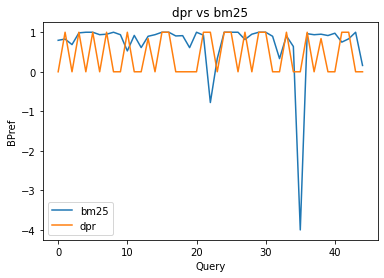

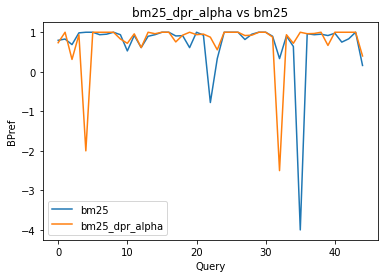

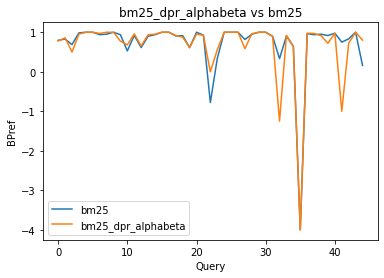

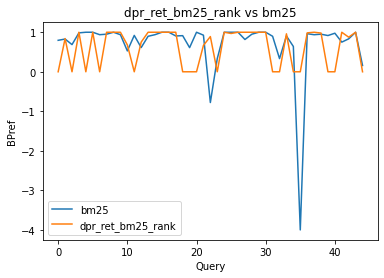

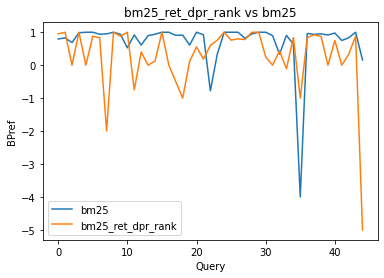

In [41]:
from matplotlib.pyplot import figure
keys = ['dpr' ,'bm25_dpr_alpha', 'bm25_dpr_alphabeta', 'dpr_ret_bm25_rank', 'bm25_ret_dpr_rank']
dpr_variations = [dpr, bm25_dpr_alpha, bm25_dpr_alphabeta, dpr_ret_bm25_rank, bm25_ret_dpr_rank]
for i in range(len(keys)):
    name = keys[i]
    model = dpr_variations[i]
    
    plt.plot(bm25.index, bm25['BPref'], label='bm25')
    plt.plot(model.index, model['BPref'], label=name)
    plt.title(f"{name} vs bm25")
    plt.xlabel("Query")
    plt.ylabel("BPref")
    plt.legend()
    plt.show()

Some findings:
- DPR has consistent plot than the BM25. While the BM25 is stable and overall is higher than DPR it has actually two spikes on it. These two spikes are two query that we will check for analysis (Query number 22 and 35)
- Two spikes on the BM25 are significantly worse than any DPR variations
- DPR retriever & BM25 reranker pattern is quite close with the DPR one
- The rest are quite dominant which signifies that the BM25 signal is dominant rather than the DPR
- Using DPR as reranker for BM25 retriever is actually bad idea as it degrades the model performance

In [44]:
lmd_group = pd.concat([lmd, dpr, lmd_dpr_alpha, lmd_dpr_alphabeta, dpr_ret_lmd_rank, lmd_ret_dpr_rank], axis=1)

In [45]:
lmd_group

,Precision,MRR,MAP,BPref,Precision,MRR,MAP,BPref,Precision,MRR,...,MAP,BPref,Precision,MRR,MAP,BPref,Precision,MRR,MAP,BPref
0,0.2,1.000000,0.611111,-0.750000,0.0,0.000000,0.000000,0.00,0.2,0.200000,...,0.642857,-0.250000,0.0,0.000000,0.000000,0.000000,0.3,1.000000,0.680556,7.777778e-01
1,0.5,1.000000,0.810000,0.720000,0.3,0.250000,0.266667,1.00,0.5,1.000000,...,0.860000,0.760000,0.5,1.000000,0.594286,0.840000,0.3,1.000000,0.666667,5.555556e-01
2,0.2,0.142857,0.182540,-2.250000,0.0,0.000000,0.000000,0.00,0.2,1.000000,...,0.642857,-0.250000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
3,1.0,1.000000,1.000000,1.000000,0.2,1.000000,0.700000,1.00,1.0,1.000000,...,1.000000,1.000000,0.4,1.000000,1.000000,1.000000,0.6,0.500000,0.497354,1.000000e+00
4,0.1,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.00,0.1,1.000000,...,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
5,0.7,1.000000,0.737585,0.714286,0.7,1.000000,0.961735,1.00,0.7,1.000000,...,0.909354,0.918367,1.0,1.000000,1.000000,1.000000,0.8,0.333333,0.642758,7.500000e-01
6,0.5,1.000000,0.966667,0.960000,0.0,0.000000,0.000000,0.00,0.5,1.000000,...,0.925000,0.880000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
7,0.6,1.000000,0.800000,0.833333,0.1,0.125000,0.125000,1.00,0.6,1.000000,...,0.766270,0.805556,0.1,0.166667,0.166667,1.000000,0.2,0.142857,0.196429,1.000000e+00
8,0.7,1.000000,0.775850,0.775510,0.0,0.000000,0.000000,0.00,0.6,1.000000,...,1.000000,1.000000,0.1,0.500000,0.500000,1.000000,0.3,0.500000,0.361905,4.444444e-01
9,1.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.00,1.0,1.000000,...,1.000000,1.000000,0.3,1.000000,1.000000,1.000000,0.4,0.200000,0.316667,8.750000e-01


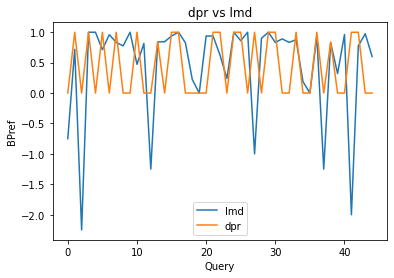

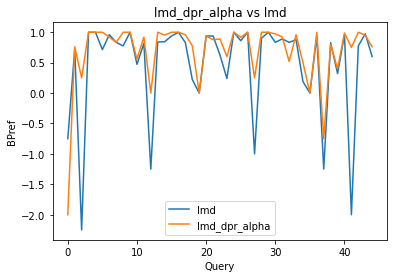

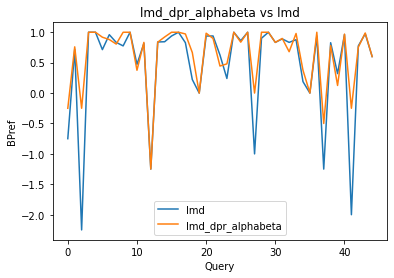

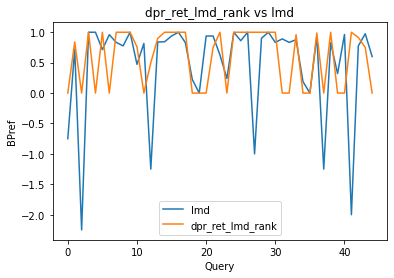

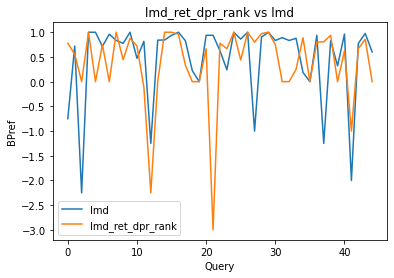

In [42]:
keys = ['dpr' ,'lmd_dpr_alpha', 'lmd_dpr_alphabeta', 'dpr_ret_lmd_rank', 'lmd_ret_dpr_rank']
dpr_variations = [dpr, lmd_dpr_alpha, lmd_dpr_alphabeta, dpr_ret_lmd_rank, lmd_ret_dpr_rank]
for i in range(len(keys)):
    name = keys[i]
    model = dpr_variations[i]
    
    plt.plot(lmd.index, lmd['BPref'], label='lmd')
    plt.plot(model.index, model['BPref'], label=name)
    plt.title(f"{name} vs lmd")
    plt.xlabel("Query")
    plt.ylabel("BPref")
    plt.legend()
    plt.show()

Some findings:
- It turns out, the phenomenon not only happens on the BM25, it's also actually happened on the LMD one.

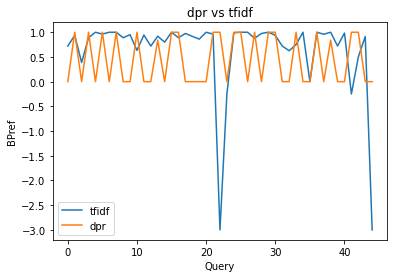

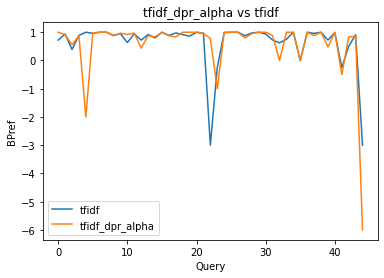

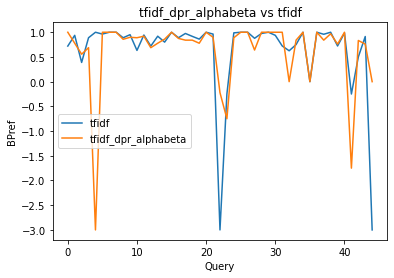

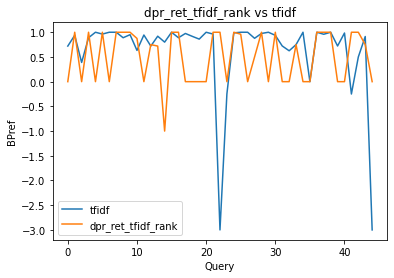

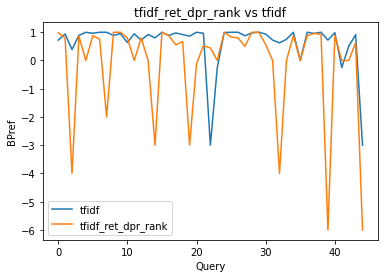

In [43]:
keys = ['dpr' ,'tfidf_dpr_alpha', 'tfidf_dpr_alphabeta', 'dpr_ret_tfidf_rank', 'tfidf_ret_dpr_rank']
dpr_variations = [dpr, tfidf_dpr_alpha, tfidf_dpr_alphabeta, dpr_ret_tfidf_rank, tfidf_ret_dpr_rank]
for i in range(len(keys)):
    name = keys[i]
    model = dpr_variations[i]
    
    plt.plot(lmd.index, tfidf['BPref'], label='tfidf')
    plt.plot(model.index, model['BPref'], label=name)
    plt.title(f"{name} vs tfidf")
    plt.xlabel("Query")
    plt.ylabel("BPref")
    plt.legend()
    plt.show()

Some findings:
- Same phenomenon occured on tf-idf
- The hybrid model of tfidf-dpr is actually less stable than the tf-idf
- Query 21 is quite interesting because any dpr variation is better than tf-idf on that query